In [27]:
import pandas as pd
from IPython.display import Image
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt
from IPython.display import display_html
from functions.utils import *
#from PIL import Image

## Chocolate bar rating dataset

In this section, we will use the dataset to examine any relationships between the average ratings and the ingredients used. The column Ingredients is of the form "#- list of ingredients". The "#" = represents the number of ingredients in the chocolate; B = Beans, S = Sugar, S* = Sweetener other than white cane or beet sugar, C = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt. 

## Analyzing the Company Locations with the highest and lowest average ratings

In this section, we analyze the company locations with the highest and lowest average ratings. By finding these company location, we can examine if there are any characterics/features that contribute to these average rating. 

We first visualize the average ratings of each company location.

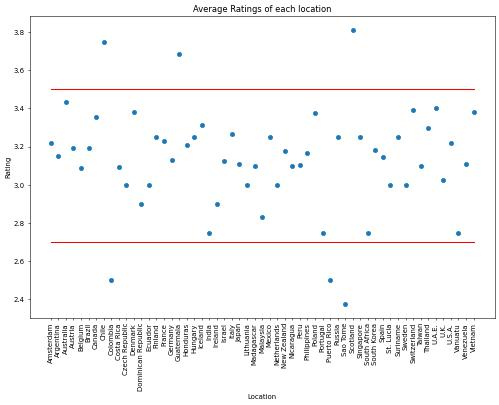

In [12]:
Image('figures/CompanyLocation_MeanRating.jpg')

From this plot, we can see that most of the countries' rating were between the range of 2.7 and 3.5 except for six locations; three above a rating of  3.5  and three below 2.7. We drew  lines at these numbers to help visualize these cutoffs. The three company locations with the high ratings are Scotland, Chile and Guatemala, with Scotland being the higest and the three lowest are SaoTome, Puerto Rico and Colombia, with Sao Tome being the worst. 

The rating of these six locations are used for further analysis to help identify any links to the ingredients that may contribute to the ratings of these chocolate bars.

## Ingredients with best average rating

Using datasets containing only the rows of the six countries from the plot above, we analyze how ingredients affect the overall ratings of chocolates and how this relationship links to the top three and bottom three rated locations.

We visualize the average ratings of each ingredients to identify and ingredients with distinguishably high or low ratings.

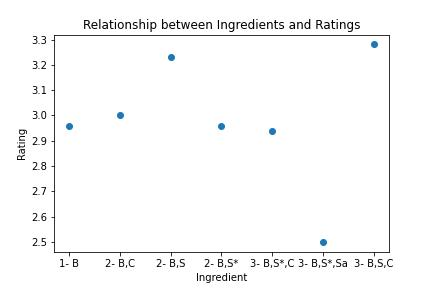

In [13]:
Image('figures/Ingredients_MeanRatings.jpg')

From the scatterplot above, the ingredient 3- B,S*,Sa has the lowest overall mean rating and the ingredients 3- B,S,C and 2-B,S have the highest ratings within the dataset.

Now, using the plot of the ingredients and ratings, we look at the ingredients of the top three and bottom three rated company locations to observe wheher low ratings may have some of the the low rated ingredients among all the companies and vice versa for the high rated locations.

The two datasets below show all the ingredients for each of the six location within the dataset. The first shows the highest rated locations and the second, the lowest rated ingredients.

In [14]:
max_comp = pd.read_csv('tables/Three_companies_with_highest_average rating.csv')
max_comp

,Company Location,Ingredients
0,Chile,"2- B,S"
1,Chile,"2- B,S"
2,Scotland,"2- B,S"
3,Scotland,"2- B,S"
4,Guatemala,"2- B,S"
5,Guatemala,"2- B,S"
6,Guatemala,"2- B,S"
7,Guatemala,"2- B,S"
8,Scotland,"3- B,S,C"
9,Scotland,"3- B,S,C"


In [15]:
min_comp = pd.read_csv('tables/Three_companies_with_lowest_average rating.csv')
min_comp

,Company Location,Ingredients
0,Colombia,NaN
1,Sao Tome,NaN
2,Puerto Rico,"2- B,S"
3,Sao Tome,"2- B,S"


From the overall analysis of both the company locations and ingredients above, the top three rated company locations have the highest overall rated ingredients  which is 2-B,S and 3-B,S,C. However, the lowest rated companies does not contain the lowest rated ingredients amongst the companies but rather some the ingredients from the ebst rated companies. The ingredients for these three locations are Nan values and 2-B,C ingredients. The low ratings of these company locations may be linked to another feature/characteristic in the dataset than can be examined through further analysis. 

To build upon the exploratory analysis of the ingredients and average ratings, we look at how the average ratings has changed over time in addition to the majority ingredient used within that year. From this, we can observe any relationships between any decrease or increases in the average ratings and the ingredients used. At each point on the scatterplot, there is the name of the ingredient that was used the most in the year.

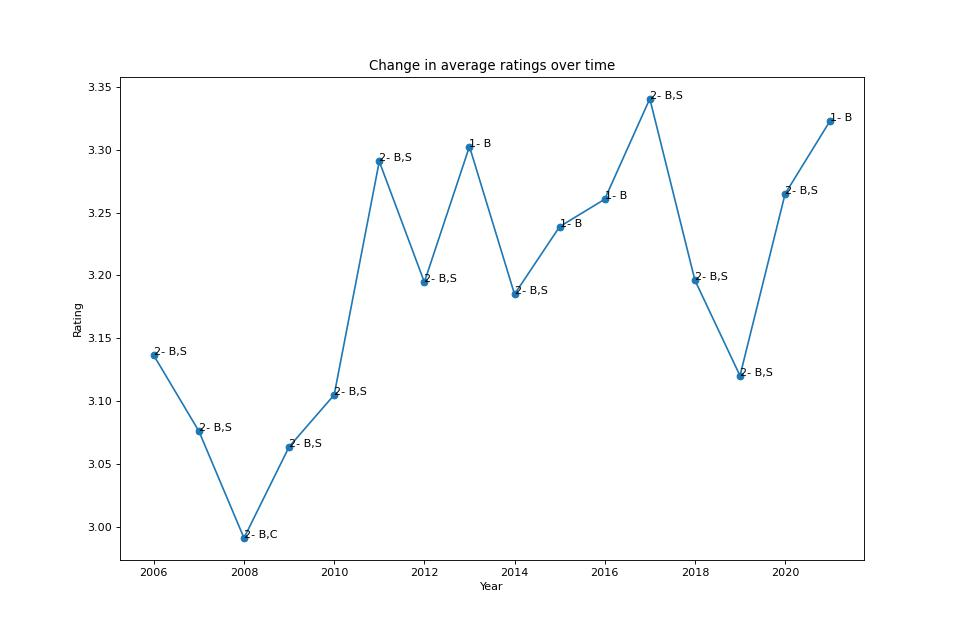

In [16]:
Image('figures/Ingredients_MeanRatings_Year.jpg')

From the figure above, there was an overall increase in the average rating in 2011. Some of the ingredients that were used in the company with the best ratings  (2-B,S) were the majority ingredients used in many of the years. Throughout each year, the majority ingredients used was 2- B,S with some years having a mafority of 2-B,C  and 1,B. There was no indication of a change within the ingredients used when there was an overall increase in the average ratings. Since the ingredients does not provide signficant information/relationships for the high and low ratings in the plots then there may be other characteristics in the dataset so can be linked to the ratings shown in the dataset

# **Analyzing 5 most frequent words in Most Memorable Characteristics and Cocoa Percent by review interval**

First, we will focus on 'Most Memorable Characteristics' feature and find out the 5 most frequent words in this feature by review interval 1-2 and 4-5. 

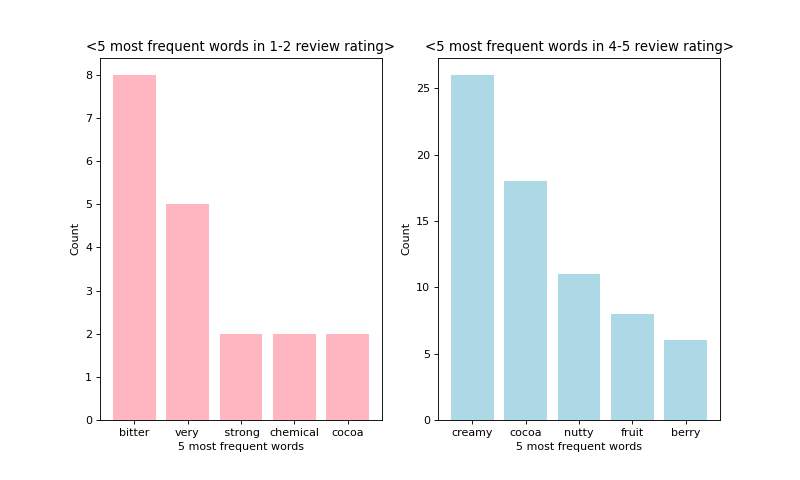

In [17]:
Image('figures/five most freqeunt words in 1-2 & 4-5 review rating.png')

Through the bar plot above, we can see that the frequent words for review rating 1-2 and the frequent words for 4-5 are clearly different. When review rating is 1-2, 'bitter' is most frequent, and in the case of 'very', it is a word that comes before 'bitter' or 'strong', so it can be seen that review rating is not good if it has a particularly strong taste. When the review rating is 4-5, it can be seen that 'creamy', 'cocoa', and 'nutty' are the most popular chocolate flavors.

Second, we will see how different the cocoa percent by review interval.

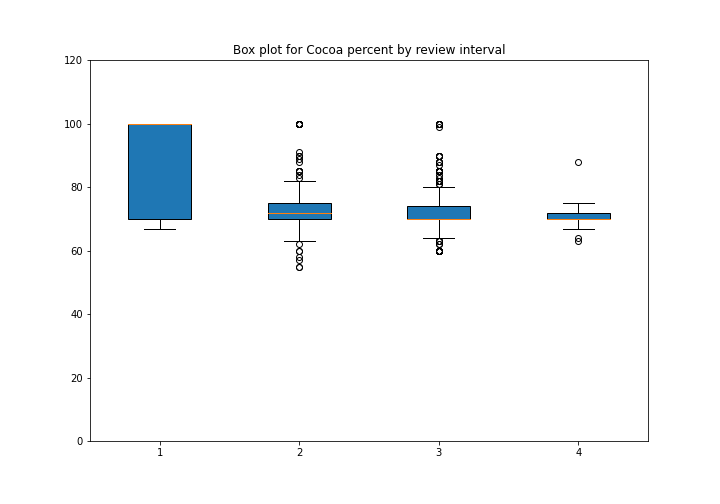

In [18]:
Image('figures/Box plot for Cocoa Percent by review interval.png')

Through the side by side box plot, it can be seen that the higher the review score, the lower the cocoa percent. In particular, in the section with a review score of 1-2, the mode of the cocoa percent is 100%, but in the review score of 4-5, it can be seen that most of them are distributed between 70%. Therefore, 70% of cocoa percent is the most appropriate, and excessive cocoa such as 100% cocoa percent has a negative effect on the review score.

# **Analyzing memorable characteristics of high and and low rated chocolate bars with a regression analysis**

We use a regression analysis to determine memorable characteristics that have significant influence on ratings. For example, does 'bitter' have a positive or negative relationship with rating? What about 'creamy'? Which memorable characteristics have the most statistically significant effect, and which have the largest effect?

Memorable characteristics of a bar are terms generally relating to anything from texture, flavor, overall opinion, etc.

To do this we create an input X data frame with all of the dummies for each characteristic, so in other words it has a feature for each unique memorable characteristics, of which there are 734. For each row, if that bar had that characteristic, there is a 1, else there is a 0. We then fit a standard OLS model where this is the input, and the outcome variable is rating, which is continuous. 

We then take the model outputs and put them into a data frame for easy filtering and manipulation. Specifically, we want to see which memorable characteristics are most statistically significant, and we want to look at memorable characteristics that had a negative effect and also separately ones that had a positive effect. We filter accordingly, which a lower threshold for negative effects because there were more statistically significant coefficients here.

The results of this analysis are shown below.

In [19]:
df_disp_high = pd.read_csv('tables/good_review_memorable_characteristics.csv')
df_disp_high

,Unnamed: 0,p-value,coef,name
0,23,8.718429e-03,0.234444,balanced
1,38,2.504779e-03,0.868794,black current
2,43,5.182544e-04,0.420081,blackberry
3,47,1.547497e-02,0.970770,blueberries
4,59,3.637186e-02,0.206921,bright fruit
5,70,1.872272e-02,0.714407,burnt brownie
6,97,2.626219e-02,0.464276,cardamom
7,98,1.070548e-02,0.714730,cardamon
8,120,1.070548e-02,0.714730,chocolate and grapes
9,128,4.846590e-02,0.365115,cinamon


In [20]:
df_disp_low = pd.read_csv('tables/bad_review_memorable_characteristics.csv')
df_disp_low

,Unnamed: 0,p-value,coef,name
0,35,2.097273e-27,-0.598600,bitter
1,79,3.158706e-04,-0.611484,burnt rubber
2,81,2.250781e-04,-1.035270,burnt up front
3,109,2.912281e-06,-0.463721,chemical
4,110,2.781201e-04,-0.733152,chemical off
5,176,3.395652e-04,-0.262095,dirty
6,188,1.644918e-08,-1.586933,dominate off note
7,198,1.567257e-05,-0.145713,earthy
8,233,7.896309e-05,-0.649563,fuel
9,259,1.813871e-05,-0.430084,harsh


From our output, we can see that some of the most positive characteristics (by p-value) are fruit descriptors such as ‘blackberry, blueberries, grape’ or spice descriptors such as ‘cinnamon, cardamon, nutmeg’.

The most negative characteristics  (by p-value) are reference bitter or burn flavors or chemical flavors, or simply ‘off’.

## Analyzing the Difference of Cocoa Percent between Different Companies

Even though the dataset is said to include over 2500 dark chocolate bars, different dark chocolate bars have different percentage of cocoa included. In the following analysis, we are trying to see if there would be a difference in the cocoa percentage of chocolate bars produced by different companies. Specifically, we calculate the mean, median, maximum and minimum cocoa percent of chocolate bars made by each company. 

In [21]:
pd.read_csv("tables/company_cocoa_percent.csv")

,Company (Manufacturer),mean cocoa percent,median cocoa percent,max cocoa percent,min cocoa percent
0,Pacari,100.0,100.0,100.0,100.0
1,Coppeneur,100.0,100.0,100.0,100.0
2,TCHO,99.0,99.0,99.0,99.0
3,Bouga Cacao (Tulicorp),88.5,88.5,100.0,77.0
4,Pralus,87.5,87.5,100.0,75.0
...,...,...,...,...,...
399,Machu Picchu Trading Co.,62.5,62.5,70.0,55.0
400,Two Ravens,60.0,60.0,60.0,60.0
401,La Pepa de Oro,60.0,60.0,60.0,60.0
402,Valrhona,60.0,60.0,60.0,60.0


From the table above, we can clearly see that there is a difference in the cocoa percent of the dark chocolate bars produced by different companies, and the range of cocoa percent is from 60% to 100%. Therefore, even if all the chocolate bars are categorized as dark chocolate bar, there's a pretty big difference in the actual cocoa percent included in different bars, and customers should pay attention to this information when purchasing dark chocolate bars.

### Analyze if the Average Cocoa Percent of Different Chocolate Bars has changed Over Times

Moving on, we will analyze to see if the averge cocoa percent of different chocolate bars from different companies has changed over times. Intuitively, there shouldn't be any big differences between the average cocoa percent of different years since a change in cocoa percent in different years would mean that many companies suddenly decided to change their cocoa percent included in their bars in that year (which would result in a big change in the average cocoa percent for the year after), and that is not likely to happen. To verify our assumptions, we calculated the mean, median, maximum and minimum cocoa percent of chocolate bars over each year. 

In [22]:
pd.read_csv("tables/year_cocoa_percent.csv")

,Review Date,mean cocoa percent,median cocoa percent,max cocoa percent,min cocoa percent
0,2006,75.454545,75.0,100.0,70.0
1,2007,73.913043,70.0,100.0,60.0
2,2008,75.392857,70.5,100.0,60.0
3,2009,72.854545,72.0,100.0,64.0
4,2010,72.330000,72.0,100.0,55.0
5,2011,71.369565,70.0,88.0,60.0
6,2012,71.955752,70.0,100.0,60.0
7,2013,74.378947,72.0,100.0,55.0
8,2014,72.801948,72.0,100.0,60.0
9,2015,72.128713,70.0,100.0,57.0


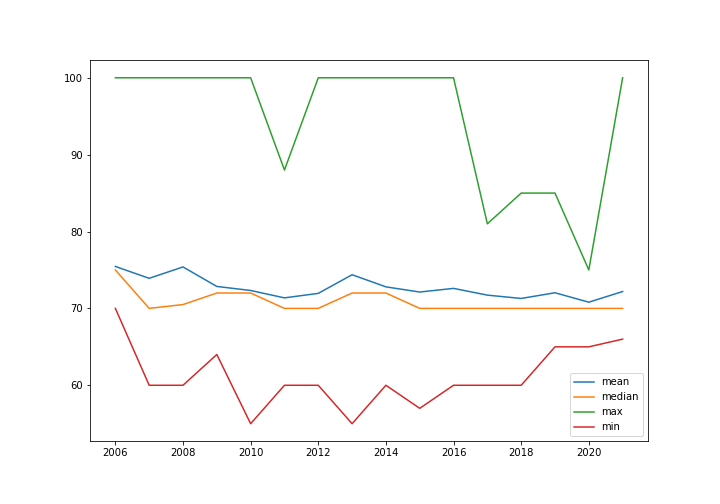

In [28]:
Image("figures/cocoa_percent_change_over_years.png")

From our table and plot above, we can see that the mean and median cocoa percent in chocolate bars have little changes over years, ranging from 70% to 75%, and we are able to conclude that there's little difference between the average cocoa percent in chocolate bars over years. However, from the plot and table, we can see that the maximum cocoa percent in chocolate bars has a sharp drop to 80%-85% over year 2017 to 2020. More data needs to be provided and more analysis needs to be done to explain that abnormal drop.

### Analysis of testing if a country of bean origin has a standout characteristics

In this part of the analysis, we are trying to see if a country of bean origin has a standout characterics. To achieve this, we took a closer look at the 'Most Memorable Characteristics' feature and analyzed if there's a specific characteristic that is mentioned for a country of bean origin for multiple times. However, the results show that there isn't a standout characteristic for most of the countries, and only three countries has a characteristic that appeared more than 10% of times: Vanuatu, Malaysia, Papua New Guinea. 

In [29]:
chocolate = pd.read_csv('data/chocolate.csv')

Vanuatu = country_common_charac(chocolate, "Vanuatu")
Malaysia = country_common_charac(chocolate, "Malaysia")
Papua = country_common_charac(chocolate, "Papua New Guinea")

dfs = {'Vanuatu': Vanuatu, 'Malaysia': Malaysia, 'Papua New Guinea': Papua}
display_dfs(dfs, justify='flex-start')

,characteristics,frequency,percentage
3,sweet,4,0.142857
0,cocoa,3,0.107143
6,woody,2,0.071429
11,smokey,2,0.071429
12,mocha,1,0.035714
19,sour milk,1,0.035714
18,bready,1,0.035714
17,rich cocoa,1,0.035714
16,creamy,1,0.035714
15,nutty,1,0.035714


From the table above, we can see that beans from Papua New Guinea has a pretty unique and standout characteristic "smokey" while the other two countries (Vanuatu and Malaysia) has the characteristic "sweet" as their most common characteristic. Overall, we conclude that there tends not to be a standout characteristic for beans from a specific country since most of the country didn't have a characteristic that is mentioned more than 10% of times. However, this result may be biased because we don't have much information and data regarding the characteristics of each country's beans and chocolate bars.

## Author Contributions

Runting Han: For this project, I analyzed the difference of cocoa percent between different companies and the change of cocoa percent in chocolate bars over years (the 'Cocoa_percent_change_analysis.ipynb' notebook) and performed the analysis to see if a country of bean origin has a standout characteristic (the 'common_charac_for_country_analysis.ipynb' notebook). In the analysis, I wrote functions and imported them from a separate python script ('functions/utils.py') along with tests and documentation and also added the pyproj.toml file. I also summarized and discussed my results for the two analysis in the 'main.ipynb' notebook. Also, I added LICENSE and a git ignore file for our project. Lastly, I collaborated with other team members for the project goals section in README.

Lia Chin-Purcell:For this project, I conducted regresssion analysis to determine memorable characteristics that have significant inlfuence on ratings in most_memorable_characteristic_regression.ipynb file and based on the p-value I seperately analyzed the positive and negative effect memorable characteristics. Also I made a Makefile and baseline for REAME file.

Minji Park: In analysis_for_review_ratings.ipynb file, I analyzed the 5 most frequent words in Most Memorable Characteristics and relationship between Cocoa Percent and review ratings. For 5 most frequent words I only focused on review rating between 1-2 and 4-5, but for Cocoa Percent I draw the box plot for every review interval. Also, I wrote the function and tests for the function in minji.ipynb file and baseline for setup.py and setup.cfg. Lastly, I collaborated with other team members for README.file.

Jenea Spinks: My notebook is the ingredients_analysis.ipynb. For this project, I firstly analyzed the company locations with the highest and lowest average rating for their chocolate bars. Using this, I analyzed the ingredients average rating and looked at those with the highest and lowest rating. I combined these two to see if the ingredients used contributed to the comanies high or low overall mean ratings. Also, I looed at how the average rating for each year changed over time and obtained the ingredients used the most within the year. I summarized and wrote my reults within this main.ipynb. I also created a Makefile and worked with my team members on the README.md file